<a href="https://colab.research.google.com/github/kennedynjoroge/Supervised-And-Unsupervised-Learning-Using-R/blob/master/E-Commerce%20Customer%20Classification%20using%20Kmeans%20and%20Hierarchical%20Clustering%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Crypto_Course_Advertisement"
author: "Kennedy Njoroge"
date: "28/02/2020"
output:
  pdf_document: default
  html_document:
    df_print: paged
---

## Business Understanding

Kira Plastinina is a Russian brand that is sold through an ecommerce retail store in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

### Specifying the question

Identify which groups of customers who purchase from Kira Plastinina website.

### Metric for success

- Grouping of customers depending on their attributes.
- Representation of groups and customers in each graphically

### Understanding the context
Customer segmenetation is key in order for sales and marketing to understand their customer group attributes and plan how best to target the customers in sales and marketing campaigns.

### Dataset
The dataset for this Independent project can be found here [http://bit.ly/EcommerceCustomersDataset

The dataset consists of 10 numerical and 8 categorical attributes. 
- The 'Revenue' attribute is the class label.
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
- The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

### Recording the experimental design
- Problem Definition
- Data Sourcing
- Check the Data
- Perform Data Cleaning
- Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
- Implement the Solution
- Challenge the Solution
- Follow up Questions

## Import Libraries

Libraries Installation

In [3]:
install.packages("corrplot")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("DataExplorer")
install.packages("factoextra")
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Load libraries

In [15]:
library(corrplot)
library(ggplot2) #Plotting
library(dplyr)
library(tidyverse)
library(DataExplorer)
library(factoextra)
library(cluster)

corrplot 0.84 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



### Import the data

In [5]:
df = read.csv('online_shoppers_intention.csv')
head(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


### Check Structure of data frame - name, type and preview of data in each column

In [6]:
str(df)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

Columns are of data type numeric, integers and Factors.

- Numeric
Daily.Time.Spent.on.Site, Area.Income, Daily.Internet.Usage : They are numeric as their values are numbers which have decimals.
- Integer
Age, Male, Cicked.on.Ad,    : Integer as it has whole numbers with no fractions.
- Factors
Ad.Topic.Line, City, Country, Timestamp : Are all factors.
Ad.Topic.Line and timestamp both have 1000 levels meaning it's distinct values per column.
City has 969 levels.
Country has 237 meaning data is from 237 countries.

### Check the Columns and rows of the dataframe

In [7]:
dim(df)

[1] 12330    18

1000 rows and 10 columns.

### Dataframe Summary Description

In [8]:
summary(df)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

## Exploratory Data Analysis

### Check Null Values

In [9]:
#Count the missing values
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

Missing values exist

### Imputation

Since it's only 14 out of 12330 records, the null ones will be dropped as there are sufficient records to proceed with the analysis.

In [0]:
# Drop null records
df <- na.omit(df)

validate the missing values

In [11]:
#Recheck the missing values
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

### Check Duplicates

In [12]:
anyDuplicated(df)

[1] 159

### Drop duplicates

In [0]:
df = distinct(df)

### Revalidate duplicates

In [18]:
anyDuplicated(df)

[1] 0

### Outliers 

### Pages Outliers

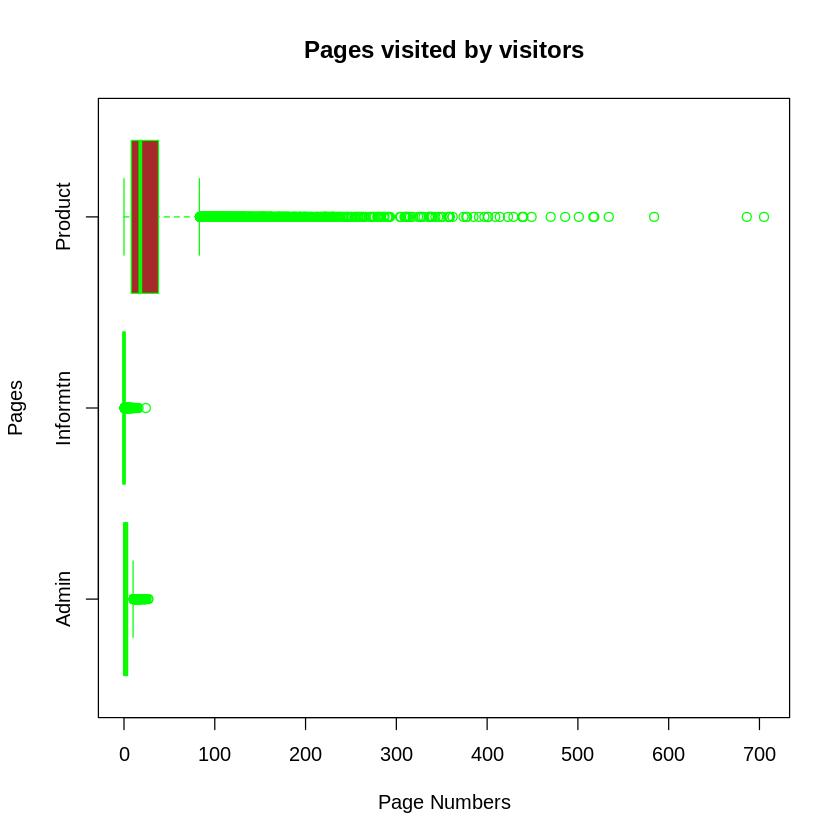

In [19]:
boxplot(df$Administrative, df$Informational,df$ProductRelated,horizontal = TRUE, names = c("Admin","Informtn","Product"),col = c("orange","red","brown"),border = "green",
        main = "Pages visited by visitors",ylab = "Pages",xlab = "Page Numbers")

All the pages have outliers. Product pages have the most outliers. These are page numbers so outliers acceptable

### Time spent on pages

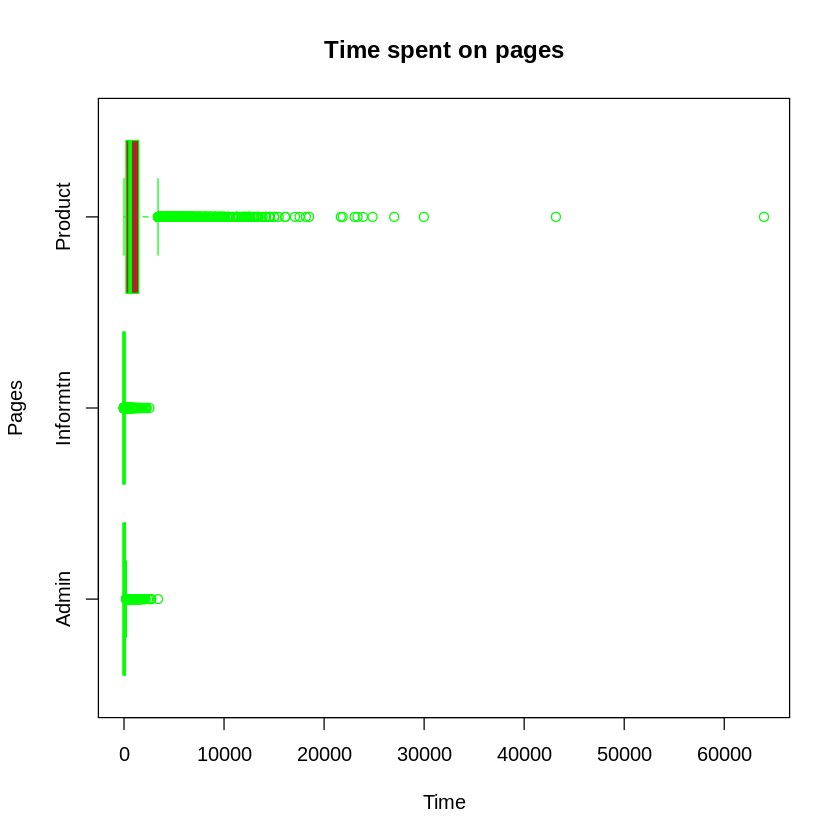

In [20]:
boxplot(df$Administrative_Duration, df$Informational_Duration,df$ProductRelated_Duration,horizontal = TRUE, names = c("Admin","Informtn","Product"),col = c("orange","red","brown"),border = "green",
        main = "Time spent on pages",ylab = "Pages",xlab = "Time")

### Google Analytics 

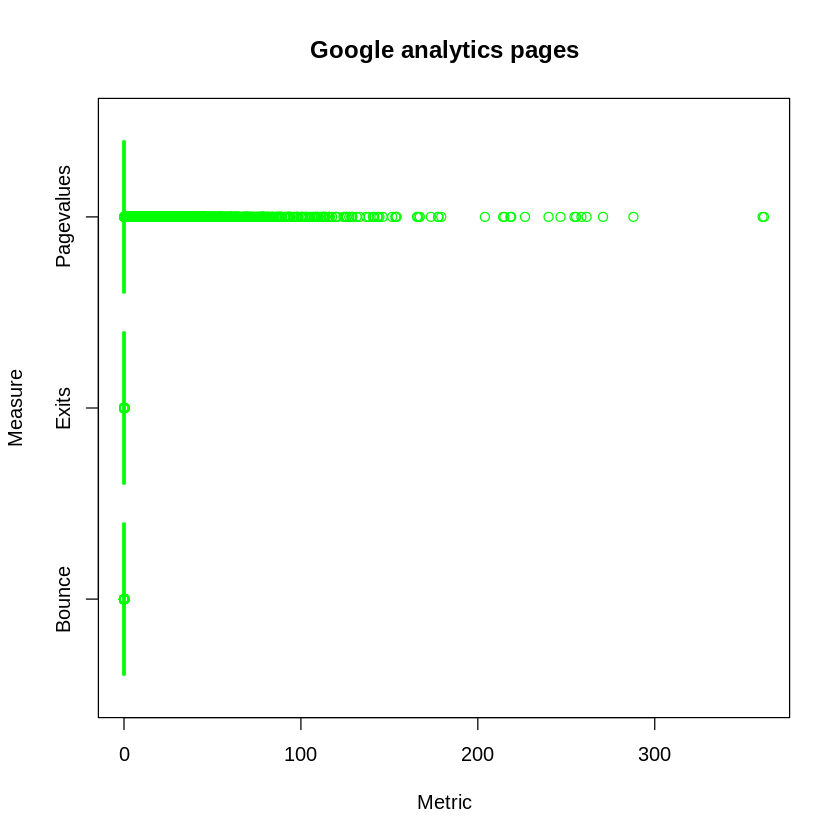

In [21]:
boxplot(df$BounceRates, df$ExitRates,df$PageValues,horizontal = TRUE, names = c("Bounce","Exits","Pagevalues"),col = c("orange","red","brown"),border = "green",
        main = "Google analytics pages",ylab = "Measure",xlab = "Metric")


All metrics have outliers. Page values has high values hence the high outlier distribution. to the right. 

#### Special Day

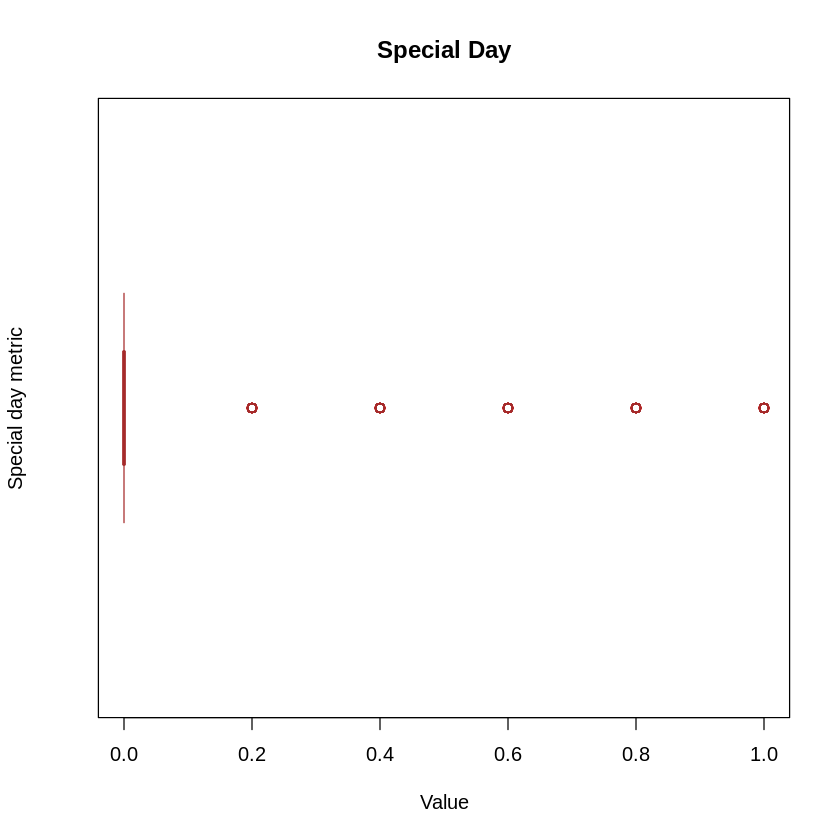

In [22]:
boxplot(df["SpecialDay"],
main = "Special Day",
xlab = "Value",
ylab = "Special day metric",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE
)

All the features above have outliers but they will not be dropped since they are real values. 

## Univariate Analsis

### Univariate Plot 

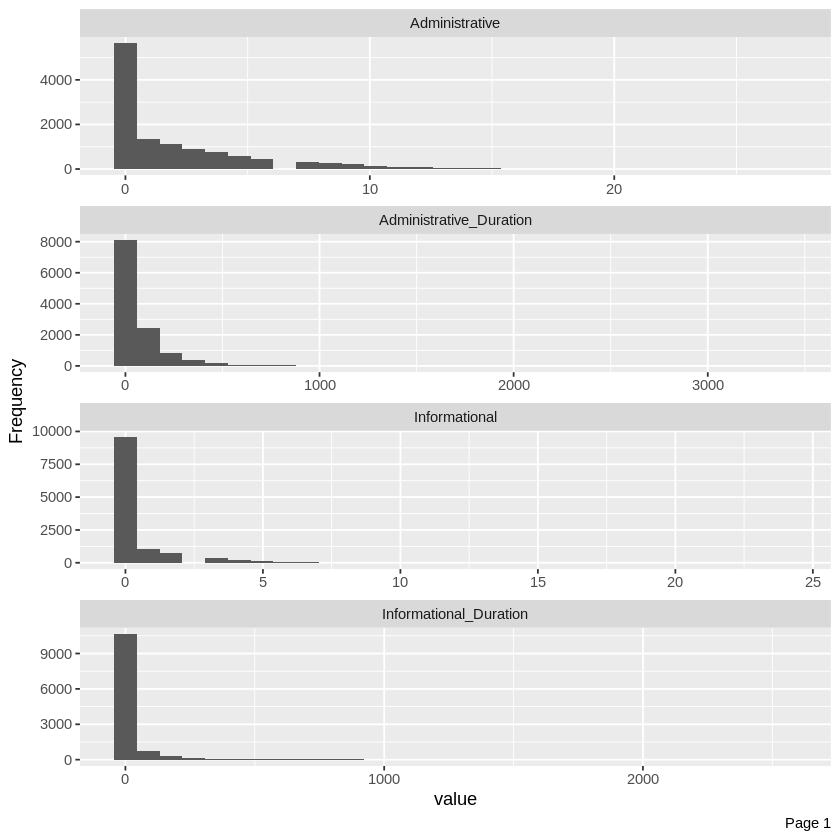

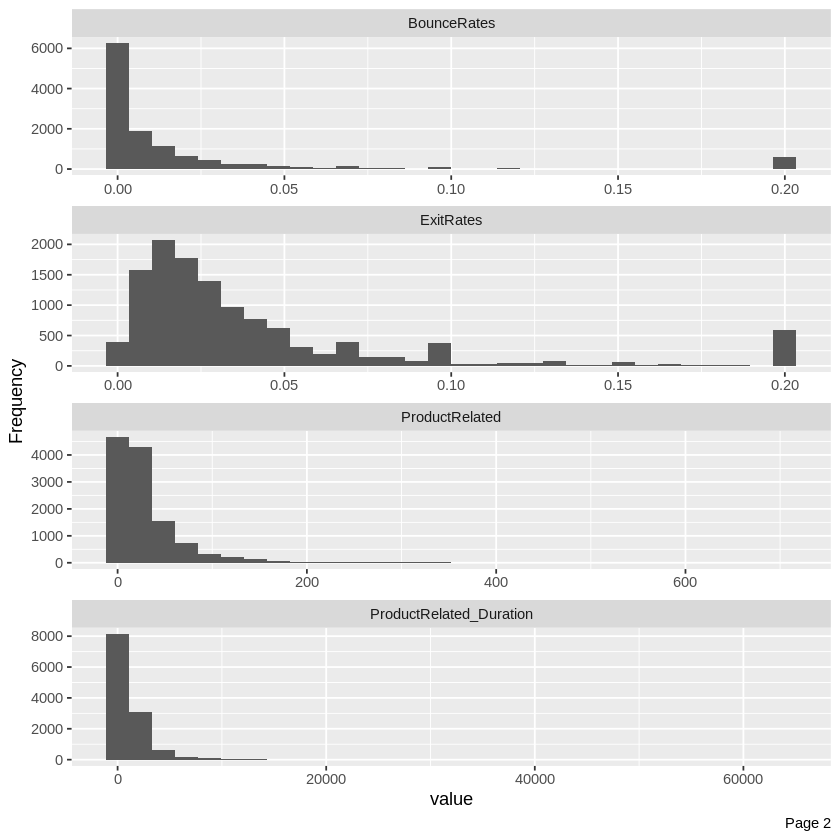

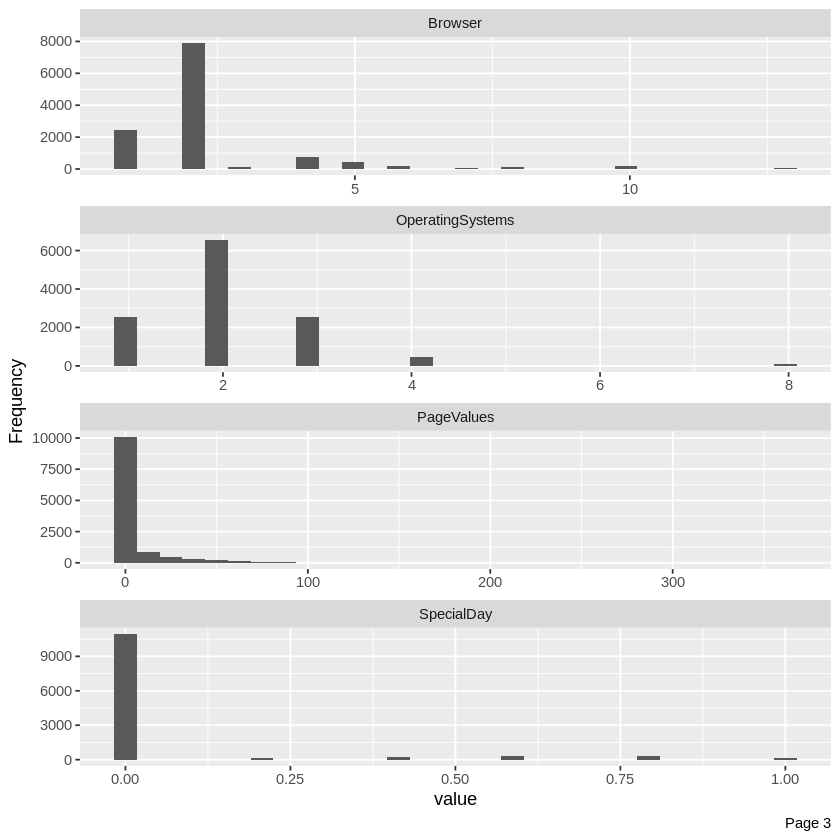

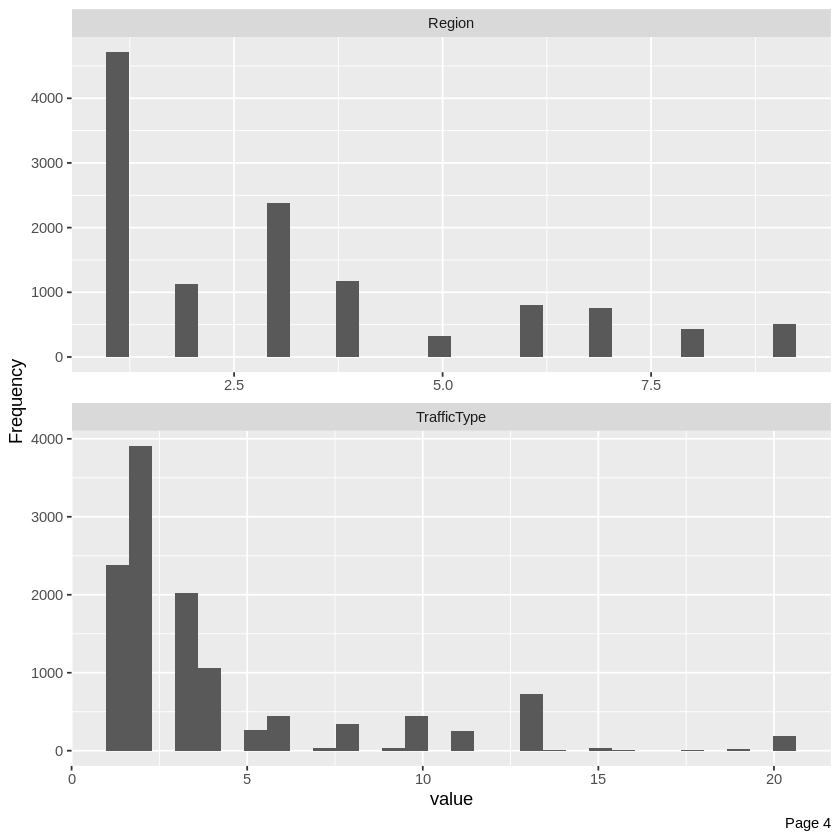

In [23]:
plot_histogram(df,ncol = 1L)

All variables are skewed to the right


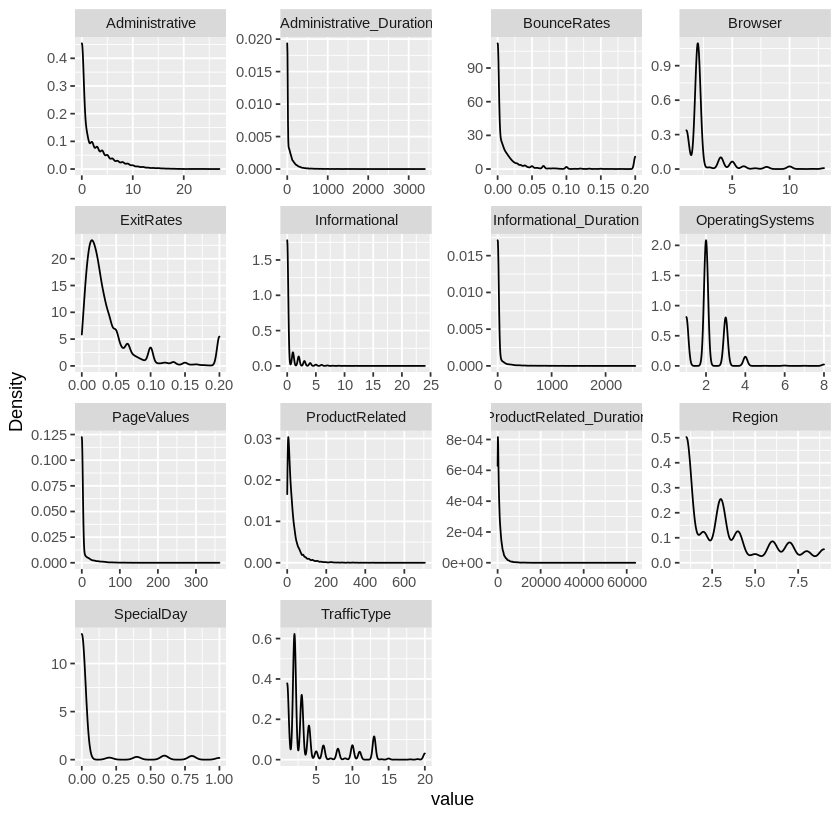

In [24]:
plot_density(df)

## Bivariate Analysis

### Which month has most revenue?

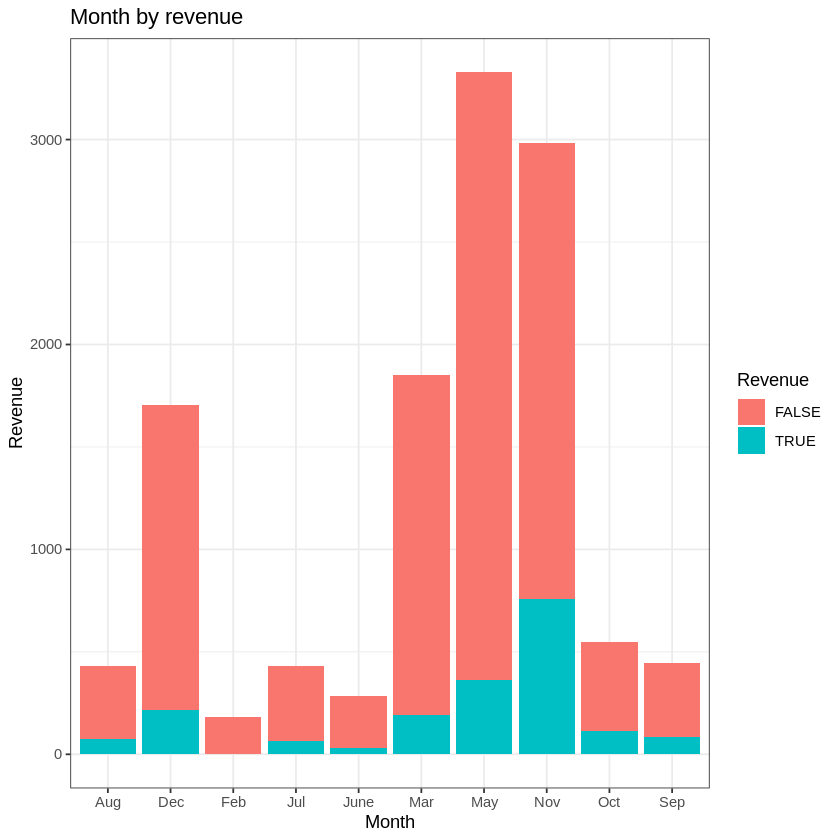

In [25]:
ggplot(df,aes(x = Month, fill = Revenue )) +
  theme_bw() + # make the background white in color instead of default grey
  geom_bar() + 
    labs(y = "Revenue", title = "Month by revenue ") # label the x and y axis

November and may have the highest revenue. February and June have the lowest revenue respectively.

### Which region brings in most revenue?

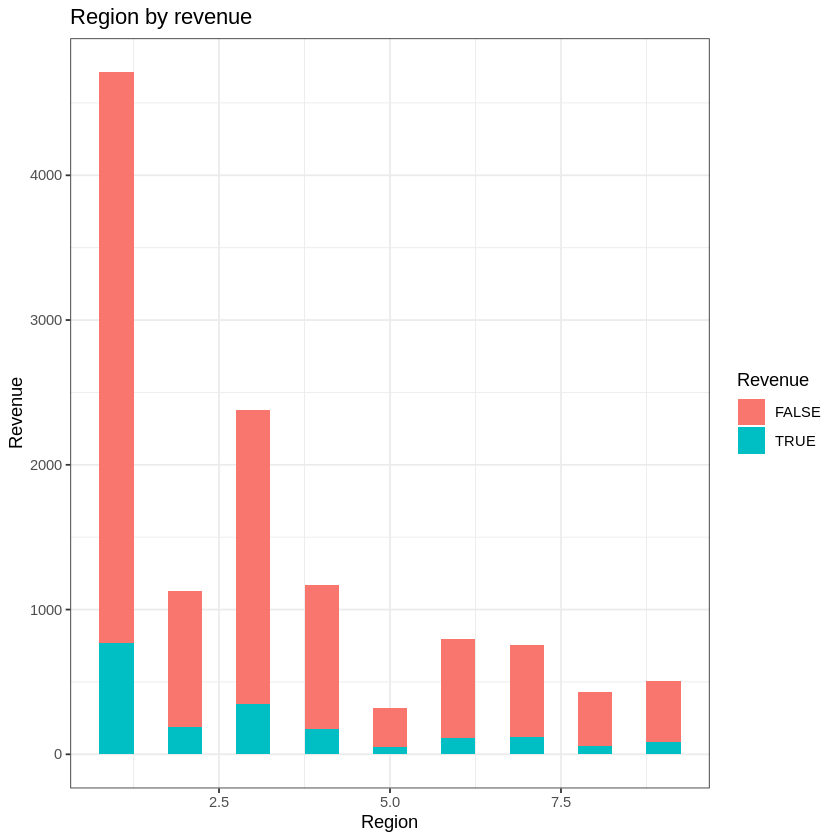

In [26]:
ggplot(df,aes(x = Region, fill = Revenue )) +
  theme_bw() + # make the background white in color instead of default grey
  geom_bar(width=0.5) + 
  labs(y = "Revenue", title = "Region by revenue ") # label the x and y axis

Region 1 has the highest revenue followed by region 3.

### Correlation

Numeric Columns

In [27]:
num_cols <- Filter(is.numeric, df)
head(num_cols)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3


#Tabular Correlation

In [28]:
cor(num_cols)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000000,0.600409653,0.37528761,0.254786021,0.428191515,0.371027224,-0.213666635,-0.311274132,0.09692097,-0.097072098,-0.006697922,-0.025763658,-0.007262053,-0.03478413
Administrative_Duration,0.600409653,1.000000000,0.30143630,0.237189860,0.286783914,0.353513793,-0.137333397,-0.202024452,0.06616837,-0.074736885,-0.007610715,-0.015833675,-0.006723711,-0.01507502
Informational,0.375287611,0.301436296,1.00000000,0.618677947,0.372604721,0.386083717,-0.109505298,-0.159566815,0.04739015,-0.049376774,-0.009625870,-0.038766808,-0.030477323,-0.03518669
Informational_Duration,0.254786021,0.237189860,0.61867795,1.000000000,0.279061948,0.346580691,-0.070159472,-0.102932678,0.03006416,-0.031293040,-0.009749983,-0.019609349,-0.027920098,-0.02516357
ProductRelated,0.428191515,0.286783914,0.37260472,0.279061948,1.000000000,0.860308186,-0.193515772,-0.286163211,0.05411549,-0.025930622,0.004090351,-0.013706213,-0.040106501,-0.04434433
ProductRelated_Duration,0.371027224,0.353513793,0.38608372,0.346580691,0.860308186,1.000000000,-0.174375499,-0.245334012,0.05084062,-0.038210652,0.002775788,-0.007838332,-0.034862498,-0.03750694
BounceRates,-0.213666635,-0.137333397,-0.10950530,-0.070159472,-0.193515772,-0.174375499,1.000000000,0.903358192,-0.11599198,0.087839995,0.026839839,-0.016018380,0.001432015,0.08919904
ExitRates,-0.311274132,-0.202024452,-0.15956681,-0.102932678,-0.286163211,-0.245334012,0.903358192,1.000000000,-0.17357154,0.116783762,0.016482012,-0.003565541,-0.001837556,0.08738623
PageValues,0.096920968,0.066168365,0.04739015,0.030064160,0.054115494,0.050840624,-0.115991977,-0.173571542,1.00000000,-0.064532709,0.018583782,0.045845065,0.010590868,0.01223694
SpecialDay,-0.097072098,-0.074736885,-0.04937677,-0.031293040,-0.025930622,-0.038210652,0.087839995,0.116783762,-0.06453271,1.000000000,0.012757766,0.003465984,-0.016452464,0.05282794


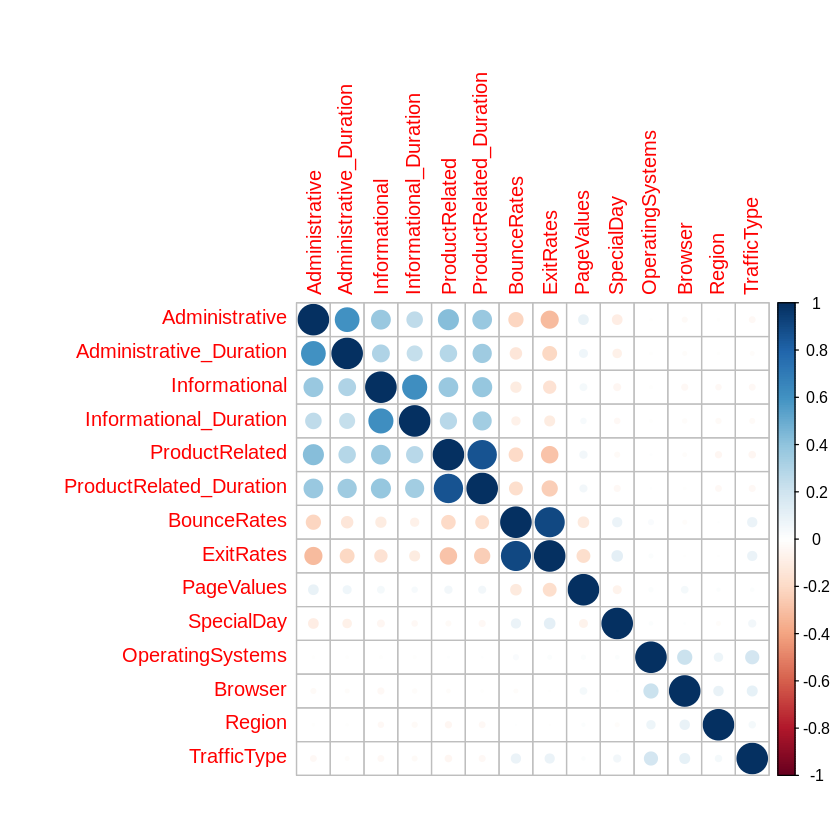

In [29]:
corrplot(cor(num_cols))

There is high correlation noted betwen:
- Administrative and administrative duration
- Information and informational duration
- Product and product related duration


## Summary

- High Correlation between above features noted. 
- Non numerical features need convesion to numerical to facilitate modelling
- Period beween Mar,May leading to Nov is the peak season in terms of sales.

## Encoding categorical variables

In [0]:
# Cleaned Dataframe backup before encoding variables
bkb_df = data.table::copy(df)

#Encode the variables

In [31]:
Month_enc = data.frame(model.matrix(~0+df$Month))
VisitorType_enc = data.frame(model.matrix(~0+df$VisitorType))
Weekend_enc = data.frame(model.matrix(~0+df$Weekend))
Revenue_enc = data.frame(model.matrix(~0+df$Revenue))

# Dropping non numerical columns 
drop_cols = c('Month', 'VisitorType','Weekend','Revenue')
df_customers = select(data.frame(cbind(df,Month_enc, VisitorType_enc,Weekend_enc,Revenue_enc)), -drop_cols)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(drop_cols)` instead of `drop_cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



Review encoded dataframe

In [32]:
tail(df_customers)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,df.MonthNov,df.MonthOct,df.MonthSep,df.VisitorTypeNew_Visitor,df.VisitorTypeOther,df.VisitorTypeReturning_Visitor,df.WeekendFALSE,df.WeekendTRUE,df.RevenueFALSE,df.RevenueTRUE
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12194,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,⋯,1,0,0,0,0,1,1,0,1,0
12195,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,⋯,0,0,0,0,0,1,0,1,1,0
12196,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,⋯,1,0,0,0,0,1,0,1,1,0
12197,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,⋯,1,0,0,0,0,1,0,1,1,0
12198,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,⋯,1,0,0,0,0,1,1,0,1,0
12199,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,⋯,1,0,0,1,0,0,0,1,1,0


## Review the new dataframe

In [33]:
str(df_customers)

'data.frame':	12199 obs. of  31 variables:
 $ Administrative                 : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration        : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration         : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated                 : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration        : num  0 64 -1 2.67 627.5 ...
 $ BounceRates                    : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates                      : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues                     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay                     : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ OperatingSystems               : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                        : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                         : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType                    : int  1 2 3 4 4 3 3 5 3 2 ...
 $ df.MonthAug                  

Normalize the dataset to eliminate some attributes having an impact on the model

Alternative approach for below is to apply the apply method.

In [34]:
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}

df_customers$Administrative<- normalize(df_customers$Administrative)
df_customers$Administrative_Duration<- normalize(df_customers$Administrative_Duration)
df_customers$Informational<- normalize(df_customers$Informational)
df_customers$Informational_Duration<- normalize(df_customers$Informational_Duration)
df_customers$ProductRelated<- normalize(df_customers$ProductRelated)
df_customers$ProductRelated_Duration<- normalize(df_customers$ProductRelated_Duration)
df_customers$BounceRates<- normalize(df_customers$BounceRates)
df_customers$ExitRates<- normalize(df_customers$ExitRates)
df_customers$PageValues<- normalize(df_customers$PageValues)
df_customers$SpecialDay<- normalize(df_customers$SpecialDay)
df_customers$OperatingSystems<- normalize(df_customers$OperatingSystems)
df_customers$Browser<- normalize(df_customers$Browser)
df_customers$Region<- normalize(df_customers$Region)
df_customers$TrafficType<- normalize(df_customers$TrafficType)
df_customers$MonthAug<- normalize(df_customers$df.MonthAug)
df_customers$MonthDec<- normalize(df_customers$df.MonthDec)
df_customers$MonthFeb<- normalize(df_customers$df.MonthFeb)
df_customers$MonthJul<- normalize(df_customers$df.MonthJul)
df_customers$MonthJune<- normalize(df_customers$df.MonthJune)
df_customers$MonthMar<- normalize(df_customers$df.MonthMar)
df_customers$MonthMay<- normalize(df_customers$df.MonthMay)
df_customers$MonthNov<- normalize(df_customers$df.MonthNov)
df_customers$MonthOct<- normalize(df_customers$df.MonthOct)
df_customers$MonthSep<- normalize(df_customers$df.MonthSep)
df_customers$VisitorTypeNew_Visitor<- normalize(df_customers$df.VisitorTypeNew_Visitor)
df_customers$VisitorTypeOther<- normalize(df_customers$df.VisitorTypeOther)
df_customers$VisitorTypeReturning_Visitor<- normalize(df_customers$df.VisitorTypeReturning_Visitor)
df_customers$WeekendFALSE<- normalize(df_customers$df.WeekendFALSE)
df_customers$WeekendTRUE<- normalize(df_customers$df.WeekendTRUE)
df_customers$RevenueFALSE<- normalize(df_customers$df.RevenueFALSE)
df_customers$RevenueTRUE<- normalize(df_customers$df.RevenueTRUE)
head(df_customers)



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,MonthNov,MonthOct,MonthSep,VisitorTypeNew_Visitor,VisitorTypeOther,VisitorTypeReturning_Visitor,WeekendFALSE,WeekendTRUE,RevenueFALSE,RevenueTRUE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,⋯,0,0,0,0,0,1,1,0,1,0
2,0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,⋯,0,0,0,0,0,1,1,0,1,0
3,0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,⋯,0,0,0,0,0,1,1,0,1,0
4,0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,⋯,0,0,0,0,0,1,1,0,1,0
5,0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,⋯,0,0,0,0,0,1,0,1,1,0
6,0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,⋯,0,0,0,0,0,1,1,0,1,0


## Modelling. Identify K. 

Use fviz_nbclust method to calculate the optimum number of clusters for kmeans.

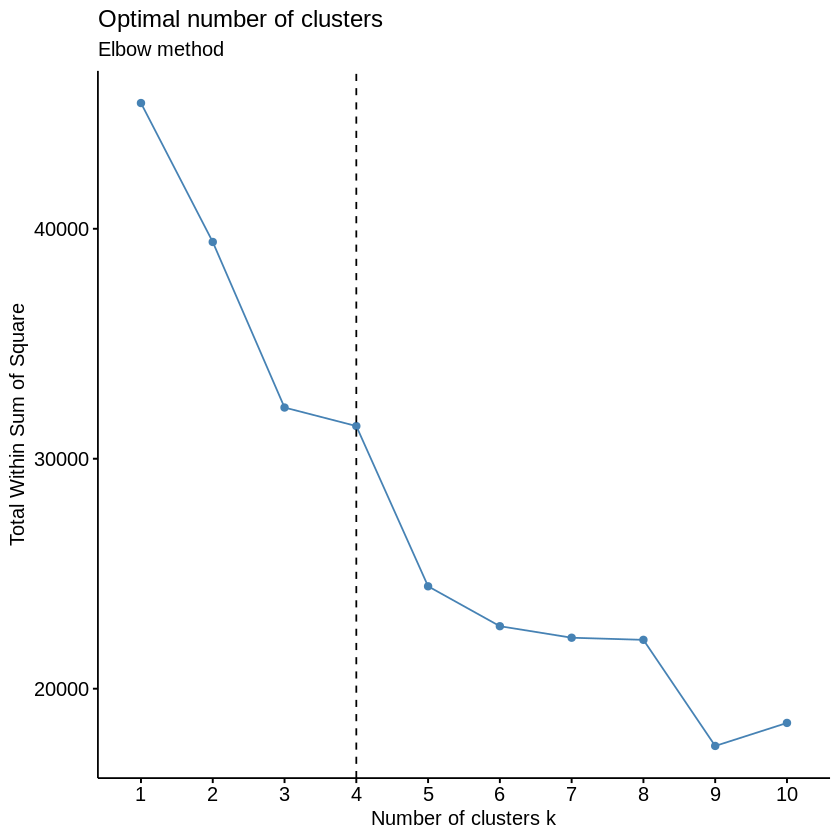

In [35]:
fviz_nbclust(df_customers, kmeans, method = "wss") +
    geom_vline(xintercept = 4, linetype = 2)+
  labs(subtitle = "Elbow method")

Model using Kmeans

4 clusters selected from output of above

In [0]:
kmeans_model = kmeans(df_customers, 4)

#### Cluster centers for each feature

In [37]:
kmeans_model$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,MonthNov,MonthOct,MonthSep,VisitorTypeNew_Visitor,VisitorTypeOther,VisitorTypeReturning_Visitor,WeekendFALSE,WeekendTRUE,RevenueFALSE,RevenueTRUE
1,0.07488460,0.02079287,0.01831391,0.012158672,0.04272231,0.017822331,0.13190559,0.2497109,0.005892807,0.07710672,⋯,0.2047748,0.03652124,0.03154753,0,0.008384255,0.9916157,1.0000000,0.0000000,1.0000000,0.0000000
2,0.13820348,0.03867455,0.03872252,0.027196073,0.07882459,0.033790915,0.03113084,0.1061021,0.066059648,0.02449529,⋯,0.4253028,0.05854643,0.03903096,0,0.010767160,0.9892328,0.7348587,0.2651413,0.0000000,1.0000000
3,0.09457242,0.02734484,0.01390530,0.007939552,0.02562408,0.009969113,0.02573067,0.1028730,0.029794446,0.02020083,⋯,0.2474897,0.07324276,0.06379209,1,0.000000000,0.0000000,0.7170703,0.2829297,0.7507383,0.2492617
4,0.08311388,0.02349768,0.02454194,0.016138275,0.04718762,0.019131609,0.11553531,0.2229194,0.005370331,0.07201210,⋯,0.2476046,0.04084720,0.03025719,0,0.003025719,0.9969743,0.0000000,1.0000000,1.0000000,0.0000000


#### Cluster number for each of the observations

In [38]:
kmeans_model$size

[1] 7037 1486 1693 1983

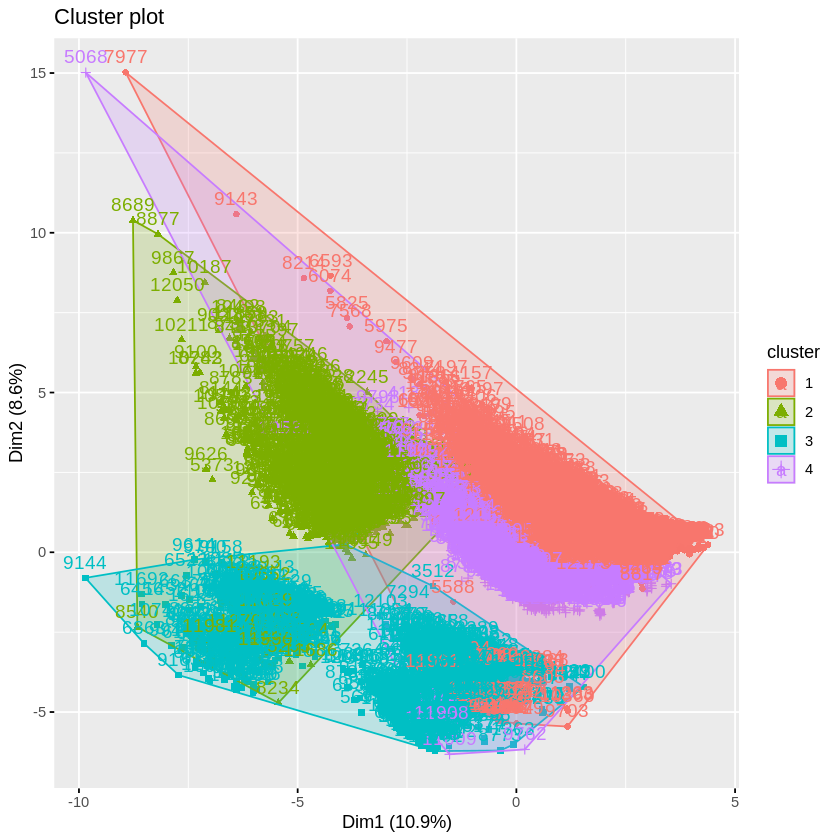

In [39]:
fviz_cluster(kmeans_model, df_customers)

Clusters 1 to 4 as above.

## Hierachichal Clustering

a) Apply Dist() function to compute the Euclidean distance between observations

In [0]:
d_customers <- dist(df_customers, method = "euclidean")

In [41]:
head(d_customers)

[1] 1.1314264 1.0930481 0.8841012 2.3467212 1.2872048 0.5625733

b) Perform hierarchical clustering using the Ward's method

In [0]:

hc_customers <- hclust(d_customers, method = "ward.D2" )


c) Plot the obtained dendrogram

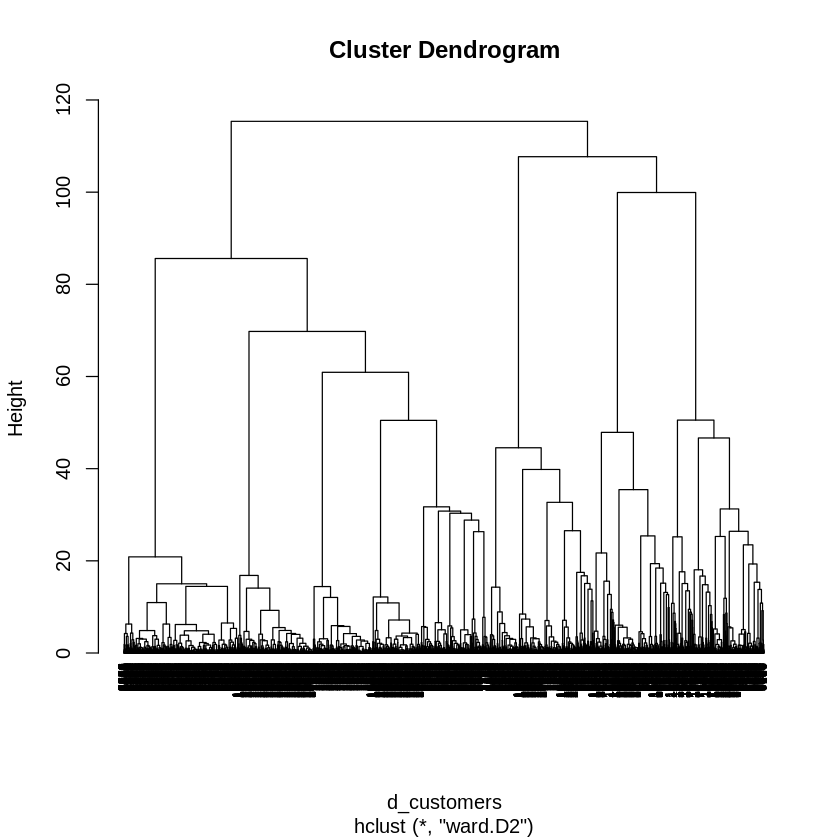

In [44]:
plot(hc_customers, cex = 0.6, hang = -1)


Conclusions

K Means is the best classifier as:
1. It has better graphical representation than hierachical. The output is easier to interpret.
2. Is able to handle all the variables inluding the numerical variables. Hierachical classifier fails to handle the many variables. Reducing the number of features solves this challenge.






